In [1]:
#男團資料前處理
import pandas as pd

file_path = 'data/kpop_boy_groups.csv'
boygroups_data = pd.read_csv(file_path, encoding='ISO-8859-1')
boygroups_data['Average_age'].fillna(pd.NA, inplace=True)

boygroups_data['Debut'] = pd.to_datetime(boygroups_data['Debut'], errors='coerce')
boygroups_data['Debut_year'] = boygroups_data['Debut'].dt.year
boygroups_data['month'] = boygroups_data['Debut'].dt.month
boygroups_data['year'] = boygroups_data['Debut'].dt.year

selected_columns = ['Name', 'Company', 'Members', 'Orig. Memb.', 'Average_age', 'year']
boygroups_data = boygroups_data[selected_columns]
print(boygroups_data.head())

    Name       Company  Members  Orig. Memb. Average_age  year
0   100%     TOP Media        4            7        20.0  2012
1    14U            BG       14           14        22.0  2017
2  1the9           MBK        9            9        19.0  2019
3    24K        Choeun        8            6        22.0  2012
4    2AM  JYP, Big Hit        4            4        20.0  2008


男團出道平均年齡最小的年份：1995，平均年齡：14.00
男團出道平均年齡最大的年份：2010，平均年齡：22.00


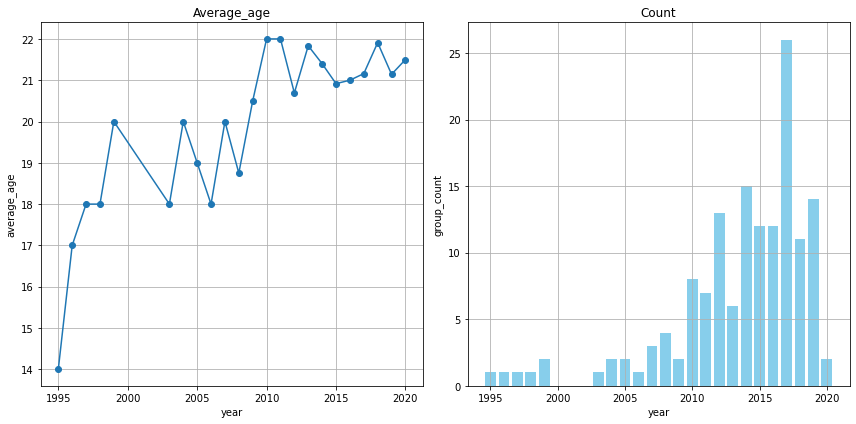

In [2]:
#繪製平均出道年齡的時間趨勢
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
average_age_by_year = boygroups_data.groupby('year')['Average_age'].mean()
plt.plot(average_age_by_year.index, average_age_by_year.values, marker='o')
plt.title('Average_age')
plt.xlabel('year')
plt.ylabel('average_age')
plt.grid(True)

#印出出道平均年齡最小的年份與出道平均年齡最大的年份
min_avg_age_year = average_age_by_year.idxmin()
min_avg_age_value = average_age_by_year.min()
max_avg_age_year = average_age_by_year.idxmax()
max_avg_age_value = average_age_by_year.max()
print(f"男團出道平均年齡最小的年份：{min_avg_age_year}，平均年齡：{min_avg_age_value:.2f}")
print(f"男團出道平均年齡最大的年份：{max_avg_age_year}，平均年齡：{max_avg_age_value:.2f}")

#繪製出道組數的時間趨勢
plt.subplot(1, 2, 2)
boygroup_count_by_year = boygroups_data['year'].value_counts().sort_index()
plt.bar(boygroup_count_by_year.index, boygroup_count_by_year.values, color='skyblue')
plt.title('Count')
plt.xlabel('year')
plt.ylabel('group_count')
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
'''
#使用皮爾森相關係數(pearsonr)計算年份(year)與男團平均年齡(Average_age)之間的相關性
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr

slope, intercept, r_value, p_value, std_err = linregress(boygroups_data['year'], boygroups_data['Average_age'])

plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='Average_age', data=boygroups_data, scatter_kws={'s': 10})

plt.title('pearsonr_relationship')
plt.xlabel('year')
plt.ylabel('average_age')

boygroups_data = boygroups_data.dropna(subset=['year', 'Average_age'])
equation = f'y = {slope:.4f}x + {intercept:.4f}\nR-squared = {r_value**2:.4f}'
plt.annotate(equation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)
plt.show()

correlation_coefficient, p_value = pearsonr(boygroups_data['year'], boygroups_data['Average_age'])
print(f'相關係數：{correlation_coefficient:.4f}')
print(f'p-value:{p_value:.4f}')
'''

"\n#使用皮爾森相關係數(pearsonr)計算年份(year)與男團平均年齡(Average_age)之間的相關性\nimport seaborn as sns\nfrom scipy.stats import linregress\nfrom scipy.stats import pearsonr\n\nslope, intercept, r_value, p_value, std_err = linregress(boygroups_data['year'], boygroups_data['Average_age'])\n\nplt.figure(figsize=(10, 6))\nsns.regplot(x='year', y='Average_age', data=boygroups_data, scatter_kws={'s': 10})\n\nplt.title('pearsonr_relationship')\nplt.xlabel('year')\nplt.ylabel('average_age')\n\nboygroups_data = boygroups_data.dropna(subset=['year', 'Average_age'])\nequation = f'y = {slope:.4f}x + {intercept:.4f}\nR-squared = {r_value**2:.4f}'\nplt.annotate(equation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)\nplt.show()\n\ncorrelation_coefficient, p_value = pearsonr(boygroups_data['year'], boygroups_data['Average_age'])\nprint(f'相關係數：{correlation_coefficient:.4f}')\nprint(f'p-value:{p_value:.4f}')\n"

In [4]:
'''
#使用斯皮爾曼等級相關係數(spearmanr)計算年份(year)與男團平均年齡(Average_age)之間的相關性
from scipy.stats import spearmanr

boygroups_data_cleaned = boygroups_data.dropna(subset=['year', 'Average_age'])
spearman_coefficient, spearman_p_value = spearmanr(boygroups_data_cleaned['year'], boygroups_data_cleaned['Average_age'])

print(f'Spearman 相關係數：{spearman_coefficient:.4f}')
print(f'p-value：{spearman_p_value:.4f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Average_age', data=boygroups_data_cleaned, s=50)
plt.title('spearmanr_relationship')
plt.xlabel('year')
plt.ylabel('average_age')
plt.show()
'''

"\n#使用斯皮爾曼等級相關係數(spearmanr)計算年份(year)與男團平均年齡(Average_age)之間的相關性\nfrom scipy.stats import spearmanr\n\nboygroups_data_cleaned = boygroups_data.dropna(subset=['year', 'Average_age'])\nspearman_coefficient, spearman_p_value = spearmanr(boygroups_data_cleaned['year'], boygroups_data_cleaned['Average_age'])\n\nprint(f'Spearman 相關係數：{spearman_coefficient:.4f}')\nprint(f'p-value：{spearman_p_value:.4f}')\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='year', y='Average_age', data=boygroups_data_cleaned, s=50)\nplt.title('spearmanr_relationship')\nplt.xlabel('year')\nplt.ylabel('average_age')\nplt.show()\n"

In [5]:
'''
#使用肯德爾等級相關係數(Kendall)計算年份(year)與男團平均年齡(Average_age)之間的相關性
from scipy.stats import kendalltau

boygroups_data_cleaned = boygroups_data.dropna(subset=['year', 'Average_age'])
kendall_coefficient, kendall_p_value = kendalltau(boygroups_data_cleaned['year'], boygroups_data_cleaned['Average_age'])

print(f'Kendall 相關係數：{kendall_coefficient:.4f}')
print(f'p-value：{kendall_p_value:.4f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Average_age', data=boygroups_data_cleaned, s=50)
plt.title('kendalltau_relationship')
plt.xlabel('year')
plt.ylabel('average_age')
plt.show()
'''

"\n#使用肯德爾等級相關係數(Kendall)計算年份(year)與男團平均年齡(Average_age)之間的相關性\nfrom scipy.stats import kendalltau\n\nboygroups_data_cleaned = boygroups_data.dropna(subset=['year', 'Average_age'])\nkendall_coefficient, kendall_p_value = kendalltau(boygroups_data_cleaned['year'], boygroups_data_cleaned['Average_age'])\n\nprint(f'Kendall 相關係數：{kendall_coefficient:.4f}')\nprint(f'p-value：{kendall_p_value:.4f}')\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='year', y='Average_age', data=boygroups_data_cleaned, s=50)\nplt.title('kendalltau_relationship')\nplt.xlabel('year')\nplt.ylabel('average_age')\nplt.show()\n"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

file_path = 'data/kpop_boy_groups.csv'
boygroups_data = pd.read_csv(file_path, encoding='ISO-8859-1')
average_age_column = 'Average_age'

#平均數
mean_age = np.mean(boygroups_data[average_age_column])
print(f'平均數: {mean_age}')

#中位數
boygroups_data[average_age_column].fillna(boygroups_data[average_age_column].median(), inplace=True) #使用中位數填充缺失值
median_age = np.median(boygroups_data[average_age_column])
print(f'中位數: {median_age}')

#眾數
mode_age = boygroups_data[average_age_column].mode()[0]
print(f'眾數: {mode_age}')

#範圍
range_age = np.ptp(boygroups_data[average_age_column])
print(f'範圍: {range_age}')

#四分位數
q1 = np.percentile(boygroups_data[average_age_column], 25)
q2 = np.percentile(boygroups_data[average_age_column], 50)
q3 = np.percentile(boygroups_data[average_age_column], 75)
print(f'四分位數 Q1: {q1}')
print(f'四分位數 Q2 (中位數): {q2}')
print(f'四分位數 Q3: {q3}')

#標準差
std_dev_age = np.std(boygroups_data[average_age_column])
print(f'標準差: {std_dev_age}')

#變異數
var_age = np.var(boygroups_data[average_age_column])
print(f'變異數: {var_age}')

#百分位數
percentile_25 = np.percentile(boygroups_data[average_age_column], 25)
percentile_50 = np.percentile(boygroups_data[average_age_column], 50)
percentile_75 = np.percentile(boygroups_data[average_age_column], 75)
print(f'百分位數 (25%): {percentile_25}')
print(f'百分位數 (50%): {percentile_50}')
print(f'百分位數 (75%): {percentile_75}')

#偏度
skewness_age = skew(boygroups_data[average_age_column])
print(f'偏度: {skewness_age}')

#峰度
kurtosis_age = kurtosis(boygroups_data[average_age_column])
print(f'峰度: {kurtosis_age}')

平均數: 20.958904109589042
中位數: 21.0
眾數: 20.0
範圍: 13.0
四分位數 Q1: 20.0
四分位數 Q2 (中位數): 21.0
四分位數 Q3: 22.0
標準差: 2.347027504977562
變異數: 5.5085381091212
百分位數 (25%): 20.0
百分位數 (50%): 21.0
百分位數 (75%): 22.0
偏度: -0.38980768104145425
峰度: 0.7979371586820543


/tmp/ipykernel_15818/4088651158.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_age_by_company_sorted.index, y=average_age_by_company_sorted.values, palette='viridis')


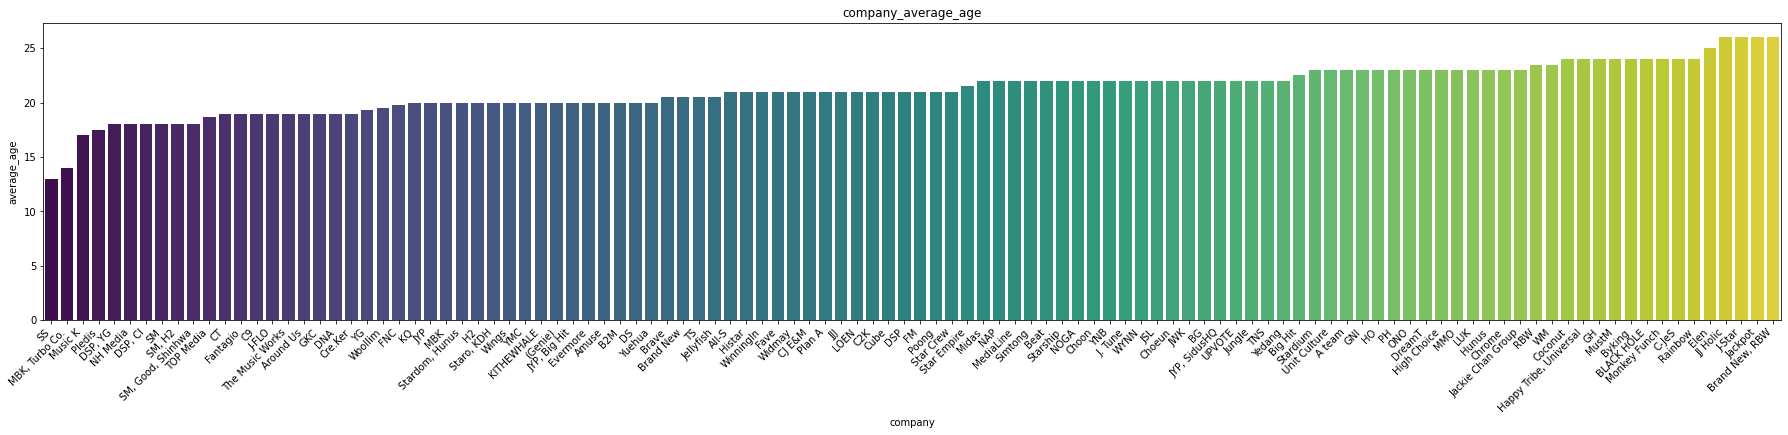

平均年齡最小的公司（前五名）：
Company
SS                13.0
MBK, Turbo Co.    14.0
Music K           17.0
Pledis            17.5
DSP, YG           18.0
Name: Average_age, dtype: float64

平均年齡最大的公司（前五名）：
Company
JJ Holic          26.0
J-Star            26.0
Jackpot           26.0
Brand New, RBW    26.0
Elen              25.0
Name: Average_age, dtype: float64


In [8]:
import seaborn as sns

average_age_by_company = boygroups_data.groupby('Company')['Average_age'].mean()
#按公司平均年齡排序
average_age_by_company_sorted = average_age_by_company.sort_values()

#繪製各公司的男團平均年齡條狀圖
plt.figure(figsize=(25, 6))
sns.barplot(x=average_age_by_company_sorted.index, y=average_age_by_company_sorted.values, palette='viridis')
plt.title('company_average_age')
plt.xlabel('company')
plt.ylabel('average_age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

#印出平均年齡最小的公司（前五名）
min_avg_age_companies = average_age_by_company_sorted.nsmallest(5)
#印出平均年齡最大的公司（前五名）
max_avg_age_companies = average_age_by_company_sorted.nlargest(5)
print("平均年齡最小的公司（前五名）：")
print(min_avg_age_companies)
print("\n平均年齡最大的公司（前五名）：")
print(max_avg_age_companies)